## K-means for Cluster Analysis

#### What is K-means?
- K-means is an unsupervised machine learning algorithm used to find groups of observations (clusters) that share similar characteristics
- What is the meaning of unsupervised learning? It means that the observations given in the data set are unlabeled, there is no outcome to be predicted
- K-means clustering only works on numerical data!

#### The Goal
The goal of this lab is to carry out a Customer Segmentation analysis to help the business with its target marketing activities. 

#### About the "Superstore" dataset
- We'll be using "Superstore.xlsx" dataset throughout this lab.
- Superstore is a fictitious company that sells medical equipment's around the world. 
- The Superstore dataset contains 505 observations and 5 different attributes

    1. CustomerID
    2. CustomerName
    3. Quantity
    4. Sales
    5. Profit

#### Download and Install Python Libraries

In [93]:
#!pip install pandas
#!pip install numpy
#!pip install scikit-learn
#!pip install matplotlib

#### Import Python Libraries

In [94]:
# Importing some common libraries that’s needed for all data science related projects
import numpy as np
import pandas as pd


# Importing different modules from the sklearn library to build the clustering model
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


# Importing matplotlib library for data visualisation 
from matplotlib import pyplot as plt
%matplotlib inline





#### Process map
Below illustrates a 8-step process used during this lab.

    1.	Import Data
    2.	Data Quality Checks
    3.	Data Cleansing
    4.	Data Pre-processing
    5.	Visualisations
    6.	Model Build
    7.	Model Evaluation
    8.	Save Predictions

#### 1. Import Data

In [95]:
# Importing the dataset as "superstore"

superstore = pd.read_excel('Superstore.xlsx')
superstore

,CustomerID,CustomerName,Quantity,Sales,Profit
0,AA-10315,Alex Avila,36,6416.018933,3889.354319
1,AA-10480,Andrew Allen,11,6418.425563,3895.713493
2,AA-10645,Anna Andreadi,13,6416.985842,3888.269487
3,AB-10015,Aaron Bergman,5,6417.396666,3888.848636
4,AB-10060,Adam Bellavance,4,6408.926508,3887.023388
...,...,...,...,...,...
500,VS-21820,Vivek Sundaresam,3,6417.949996,3896.112927
501,WB-21850,William Brown,4,6418.349108,3895.797384
502,YC-21895,Yoseph Carroll,15,6416.622457,3887.715735
503,YS-21880,Yana Sorensen,3,6418.843684,3896.306417


#### 2. Data Quality Checks

    2.1 Check data
    2.2 Check shape of data
    2.3 Check for duplicates
    2.4 Check for missing values

In [96]:
# 2.1
# Viewing top 5 records

superstore.head()

,CustomerID,CustomerName,Quantity,Sales,Profit
0,AA-10315,Alex Avila,36,6416.018933,3889.354319
1,AA-10480,Andrew Allen,11,6418.425563,3895.713493
2,AA-10645,Anna Andreadi,13,6416.985842,3888.269487
3,AB-10015,Aaron Bergman,5,6417.396666,3888.848636
4,AB-10060,Adam Bellavance,4,6408.926508,3887.023388


In [97]:
# 2.2
# Looking at the structure of the dataframe

superstore.shape

(505, 5)

In [98]:
# 2.3
# Let’s use duplicated() function to identify how many duplicate records there are in the dataset

superstore.duplicated().sum()

0

In [99]:
# 2.4
# This method prints out information about a dataframe including the index, dtype, columns, non-null values and memory usage
# This method is also useful for finding out missing values in a dataset
# if found, we can use interpolation techniques to rectify those missing values

superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    505 non-null    object 
 1   CustomerName  505 non-null    object 
 2   Quantity      505 non-null    int64  
 3   Sales         505 non-null    float64
 4   Profit        505 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.9+ KB


#### 3. Data Cleansing

    3.1 Remove duplicates
    3.2 Fill missing values

In [100]:
# 3.1
# This is how you remove all the duplicates from the dataset using drop_duplicates() function

#superstore = superstore.drop_duplicates()

In [101]:
# 3.2
# Fill missing values (NaN, Null) with median value of a column
# This is how you fix missing values for all columns

# superstore = superstore.fillna(df.median())

#### 4. Data Pre-processing

    4.1 Creating a copy of the "superstore" dataframe
    4.2 Data scaling or normalisation
    4.3 Filter columns

In [102]:
# 4.1
# creating a copy of the "superstore" dataframe
# This new dataframe “df” will be used in the next few steps for data manipulation work

df = superstore.copy()
df

,CustomerID,CustomerName,Quantity,Sales,Profit
0,AA-10315,Alex Avila,36,6416.018933,3889.354319
1,AA-10480,Andrew Allen,11,6418.425563,3895.713493
2,AA-10645,Anna Andreadi,13,6416.985842,3888.269487
3,AB-10015,Aaron Bergman,5,6417.396666,3888.848636
4,AB-10060,Adam Bellavance,4,6408.926508,3887.023388
...,...,...,...,...,...
500,VS-21820,Vivek Sundaresam,3,6417.949996,3896.112927
501,WB-21850,William Brown,4,6418.349108,3895.797384
502,YC-21895,Yoseph Carroll,15,6416.622457,3887.715735
503,YS-21880,Yana Sorensen,3,6418.843684,3896.306417


In [103]:
# 4.2
# "superstore" data needs to be scaled before doing the clustering, 
# for this we can use min-max scaler from sklearn library

scaler = MinMaxScaler()
df.loc[:,["Quantity", "Sales", "Profit"]] = scaler.fit_transform(df.loc[:,["Quantity", "Sales", "Profit"]])
df

,CustomerID,CustomerName,Quantity,Sales,Profit
0,AA-10315,Alex Avila,0.636364,0.719997,0.306233
1,AA-10480,Andrew Allen,0.181818,0.931883,0.830440
2,AA-10645,Anna Andreadi,0.218182,0.805127,0.216807
3,AB-10015,Aaron Bergman,0.072727,0.841297,0.264548
4,AB-10060,Adam Bellavance,0.054545,0.095561,0.114087
...,...,...,...,...,...
500,VS-21820,Vivek Sundaresam,0.036364,0.890013,0.863366
501,WB-21850,William Brown,0.054545,0.925152,0.837355
502,YC-21895,Yoseph Carroll,0.254545,0.773133,0.171160
503,YS-21880,Yana Sorensen,0.036364,0.968696,0.879316


In [104]:
# 4.3
# Slicing/filtering out only the numerical columns
# These will be used during the clustering stage
# K-means algorithm only works on numerical data

X = df.loc[:,["Quantity", "Sales", "Profit"]]
X

,Quantity,Sales,Profit
0,0.636364,0.719997,0.306233
1,0.181818,0.931883,0.830440
2,0.218182,0.805127,0.216807
3,0.072727,0.841297,0.264548
4,0.054545,0.095561,0.114087
...,...,...,...
500,0.036364,0.890013,0.863366
501,0.054545,0.925152,0.837355
502,0.254545,0.773133,0.171160
503,0.036364,0.968696,0.879316


In [105]:
# NOTE: the following code can be used to reverse the scaling to process to produce the original data
# This is useful during analysis of cluster centres.

#scaler.inverse_transform(X)

#### 5. Visualisations

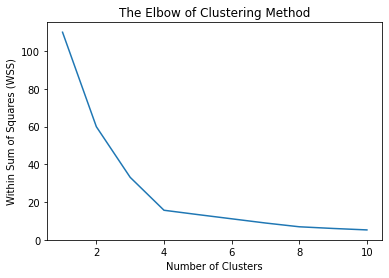

In [106]:
# Building the K-means model and using the elbow method to find the optimal number of clusters

# Importing KMeans module from the sklearn library
from sklearn.cluster import KMeans


# Fitting different number of clusters (from 1 to 11) to find out the optimal number of clusters
# We can use a for loop to fit different number of clusters to "superstore" dataset
# This will be revealed by WSS value (kmeans.inertia_)

wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

    

# Importing pyplot module from the matplotlib library for creating a line chart

from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(range(1, 11), wss)
plt.title('The Elbow of Clustering Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Sum of Squares (WSS)')
plt.show()

In [107]:
# Within Sum of Squares (WSS) values for each clustering stage.
wssinfo = pd.DataFrame(wss, index=range(1,11), columns=["WSS"])

# wssinfo
wssinfo

,WSS
1,110.015408
2,59.920356
3,33.087827
4,15.628290
5,13.333331
6,11.100528
7,8.868166
8,6.866466
9,5.976599
10,5.203725


#### 6. Model Build
- From the above chart we can see the optimal number of clusters for this dataset is 4

In [108]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
clusters = kmeans.fit_predict(X)
clusters

array([0, 3, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 3, 2, 0, 3, 2, 0, 2, 1, 3, 0,
       1, 1, 0, 3, 0, 3, 3, 2, 3, 0, 3, 1, 2, 2, 2, 3, 1, 1, 1, 2, 1, 3,
       0, 2, 3, 1, 0, 0, 3, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 1, 1, 1, 0,
       1, 2, 1, 3, 2, 1, 2, 3, 1, 2, 1, 0, 0, 1, 0, 0, 1, 3, 0, 1, 1, 0,
       2, 3, 0, 1, 1, 2, 0, 1, 3, 0, 2, 3, 1, 1, 1, 1, 2, 1, 0, 3, 1, 3,
       0, 2, 0, 2, 2, 0, 2, 0, 3, 0, 3, 3, 0, 0, 1, 3, 3, 3, 3, 0, 1, 1,
       0, 3, 0, 3, 2, 0, 0, 3, 0, 3, 0, 0, 3, 1, 3, 1, 1, 0, 3, 0, 2, 2,
       0, 0, 0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 0, 1, 1, 3, 3, 2, 1, 0, 1,
       3, 1, 2, 1, 3, 3, 2, 3, 0, 2, 2, 0, 1, 0, 1, 0, 3, 0, 2, 3, 3, 2,
       1, 1, 2, 0, 0, 3, 0, 3, 2, 0, 1, 3, 3, 3, 3, 3, 2, 3, 1, 3, 0, 2,
       2, 1, 2, 3, 0, 0, 2, 0, 0, 2, 1, 2, 2, 3, 3, 1, 3, 1, 2, 3, 2, 2,
       1, 0, 1, 3, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 3, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 3, 1, 1, 3, 3, 0, 1, 0, 3, 2, 1, 1, 3, 2, 3,
       2, 3, 3, 3, 2, 0, 1, 2, 1, 3, 2, 1, 0, 3, 0,

In [109]:
# Attaching cluster info to superstore dataframe
superstore["Clusters"] = pd.DataFrame(clusters)
superstore

,CustomerID,CustomerName,Quantity,Sales,Profit,Clusters
0,AA-10315,Alex Avila,36,6416.018933,3889.354319,0
1,AA-10480,Andrew Allen,11,6418.425563,3895.713493,3
2,AA-10645,Anna Andreadi,13,6416.985842,3888.269487,0
3,AB-10015,Aaron Bergman,5,6417.396666,3888.848636,0
4,AB-10060,Adam Bellavance,4,6408.926508,3887.023388,1
...,...,...,...,...,...,...
500,VS-21820,Vivek Sundaresam,3,6417.949996,3896.112927,3
501,WB-21850,William Brown,4,6418.349108,3895.797384,3
502,YC-21895,Yoseph Carroll,15,6416.622457,3887.715735,0
503,YS-21880,Yana Sorensen,3,6418.843684,3896.306417,3


#### 7. Model Evaluation

In [110]:
# Counting how many items in each cluster

superstore.Clusters.value_counts()

1    127
3    126
2    126
0    126
Name: Clusters, dtype: int64

In [111]:
# Exploring cluster centre info --> scaled version

kmeans.cluster_centers_

array([[0.1975469 , 0.76882819, 0.25195318],
       [0.18797423, 0.12580728, 0.14221832],
       [0.18412698, 0.37656733, 0.72268945],
       [0.17215007, 0.88021112, 0.87544737]])

In [112]:
# Exploring cluster centre info --> unscaled version

scaler.inverse_transform(kmeans.cluster_centers_)

array([[  11.86507937, 6416.57356074, 3888.6958458 ],
       [  11.33858268, 6409.27004563, 3887.36464681],
       [  11.12698413, 6412.11821082, 3894.40637051],
       [  10.46825397, 6417.83866263, 3896.25948434]])

In [113]:
# Cluster centre info in dataframe layout

cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                               index=["C0", "C1", "C2","C3"], 
                               columns=["Quantity", "Sales", "Profit"])

cluster_centers

,Quantity,Sales,Profit
C0,11.865079,6416.573561,3888.695846
C1,11.338583,6409.270046,3887.364647
C2,11.126984,6412.118211,3894.406371
C3,10.468254,6417.838663,3896.259484


In [114]:
# Exploring cluster labels

kmeans.labels_

array([0, 3, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 3, 2, 0, 3, 2, 0, 2, 1, 3, 0,
       1, 1, 0, 3, 0, 3, 3, 2, 3, 0, 3, 1, 2, 2, 2, 3, 1, 1, 1, 2, 1, 3,
       0, 2, 3, 1, 0, 0, 3, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 1, 1, 1, 0,
       1, 2, 1, 3, 2, 1, 2, 3, 1, 2, 1, 0, 0, 1, 0, 0, 1, 3, 0, 1, 1, 0,
       2, 3, 0, 1, 1, 2, 0, 1, 3, 0, 2, 3, 1, 1, 1, 1, 2, 1, 0, 3, 1, 3,
       0, 2, 0, 2, 2, 0, 2, 0, 3, 0, 3, 3, 0, 0, 1, 3, 3, 3, 3, 0, 1, 1,
       0, 3, 0, 3, 2, 0, 0, 3, 0, 3, 0, 0, 3, 1, 3, 1, 1, 0, 3, 0, 2, 2,
       0, 0, 0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 0, 1, 1, 3, 3, 2, 1, 0, 1,
       3, 1, 2, 1, 3, 3, 2, 3, 0, 2, 2, 0, 1, 0, 1, 0, 3, 0, 2, 3, 3, 2,
       1, 1, 2, 0, 0, 3, 0, 3, 2, 0, 1, 3, 3, 3, 3, 3, 2, 3, 1, 3, 0, 2,
       2, 1, 2, 3, 0, 0, 2, 0, 0, 2, 1, 2, 2, 3, 3, 1, 3, 1, 2, 3, 2, 2,
       1, 0, 1, 3, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 3, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 3, 1, 1, 3, 3, 0, 1, 0, 3, 2, 1, 1, 3, 2, 3,
       2, 3, 3, 3, 2, 0, 1, 2, 1, 3, 2, 1, 0, 3, 0,

In [115]:
# creating another copy of the "superstore" dataframe for ease of reference while plotting

df2=superstore.copy()
df2

,CustomerID,CustomerName,Quantity,Sales,Profit,Clusters
0,AA-10315,Alex Avila,36,6416.018933,3889.354319,0
1,AA-10480,Andrew Allen,11,6418.425563,3895.713493,3
2,AA-10645,Anna Andreadi,13,6416.985842,3888.269487,0
3,AB-10015,Aaron Bergman,5,6417.396666,3888.848636,0
4,AB-10060,Adam Bellavance,4,6408.926508,3887.023388,1
...,...,...,...,...,...,...
500,VS-21820,Vivek Sundaresam,3,6417.949996,3896.112927,3
501,WB-21850,William Brown,4,6418.349108,3895.797384,3
502,YC-21895,Yoseph Carroll,15,6416.622457,3887.715735,0
503,YS-21880,Yana Sorensen,3,6418.843684,3896.306417,3


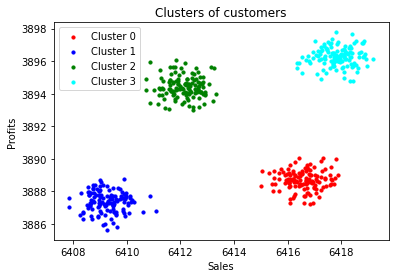

In [116]:
# Importing pyplot module from the matplotlib library for creating a scatter plot

from matplotlib import pyplot as plt
%matplotlib inline



# Using loc[] slicing/filtering method to extract X and Y axis information

plt.scatter(df2.loc[df2.Clusters==0,"Sales"], df2.loc[df2.Clusters==0,"Profit"], s = 10, c = 'red', label = 'Cluster 0')
plt.scatter(df2.loc[df2.Clusters==1,"Sales"], df2.loc[df2.Clusters==1,"Profit"], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(df2.loc[df2.Clusters==2,"Sales"], df2.loc[df2.Clusters==2,"Profit"], s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(df2.loc[df2.Clusters==3,"Sales"], df2.loc[df2.Clusters==3,"Profit"], s = 10, c = 'cyan', label = 'Cluster 3')



# Configuring other attributes/labels to display in the scatterplot

plt.title('Clusters of customers')
plt.xlabel('Sales')
plt.ylabel('Profits')
plt.legend()
plt.show()

#### 8. Save Predictions

In [117]:
# Save the "superstore" dataframe as a CSV file

superstore.to_csv("clusteredcustomerdata.csv", header=True, index=False, encoding="utf-8")